In [1]:
import fxcmpy

# www.fxcm.com                                                                                        
#   - login (id: D261121195 pass: 9861)                                                               
#   - token: 8f807efc5b648f6c1880b643a67c30a674524eec  (can be generated from web platform)           
apitoken = "8f807efc5b648f6c1880b643a67c30a674524eec"
api = fxcmpy.fxcmpy(access_token=apitoken, log_level='error')

In [4]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')
<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9 MB


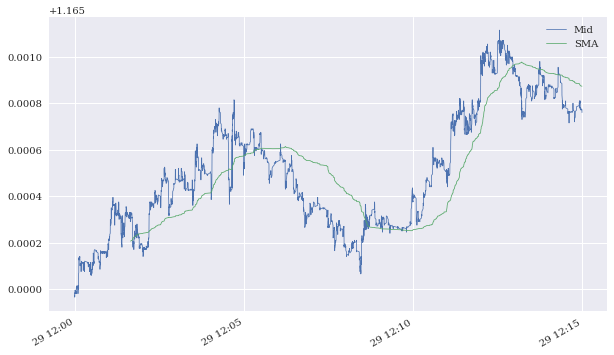

In [5]:
from fxcmpy import fxcmpy_tick_data_reader as tdr
print(tdr.get_available_symbols())
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)
td = tdr('EURUSD', start, stop)
td.get_raw_data().info()
td.get_data().info()
td.get_data().head()
sub = td.get_data(start='2018-06-29 12:00:00', end='2018-06-29 12:15:00')
sub.head()
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75)